In [1]:
#importacoes

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# Credito

## Lendo a base

In [2]:
#ler a base de dados
credito = pd.read_csv("credit_data.csv")
credito

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


## Explorando a base

In [3]:
credito.describe()
#idade negativa

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [4]:
credito[credito['age'] < 0]
#remover esses valores e substituir pela media da idade

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [5]:
#novo dataset sem os valores incocistentes
credito2 = credito.drop(credito[credito['age'] < 0].index)
credito2

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [6]:
credito['age'][credito['age'] > 0].mean()

40.92770044906149

In [7]:
credito2['age'].mean()

40.92770044906149

## Tratando variáveis inconcistentes

In [8]:
#subistituir valores inconcistentes pela media

credito.loc[credito['age'] < 0, 'age'] = credito['age'][credito['age'] > 0].mean()

In [9]:
credito.head(27)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


In [10]:
credito.info()
#3 valores nulos na idade
credito.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       1997 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [11]:
#achar os valores nulos
credito.loc[pd.isnull(credito['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [12]:
#subistituir os valores faltantes da idade pela media
credito['age'].fillna(credito['age'].mean(), inplace=True)
credito.isnull().sum()

C:\Users\thiag\AppData\Local\Temp\ipykernel_20972\244485227.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credito['age'].fillna(credito['age'].mean(), inplace=True)


clientid    0
income      0
age         0
loan        0
default     0
dtype: int64

## Previsores e Classe

In [13]:
#divisao do dataset
#nao utilizando o client_id
x_credito = credito.iloc[:,1:4].values

In [14]:
x_credito

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [15]:
y_credito = credito.iloc[:, 4].values

In [16]:
x_credito[:,0].min(), x_credito[:,1].min(), x_credito[:,2].min()

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [17]:
#deixar as variaveis na mesma escala
from sklearn.preprocessing import StandardScaler
scaler_credito = StandardScaler()
x_credito = scaler_credito.fit_transform(x_credito)

In [18]:
x_credito[:,0].min(), x_credito[:,1].min(), x_credito[:,2].min()

(-1.7676158019964077, -1.7264154144794286, -1.4592791099462408)

## Divisão de treinamento e teste

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_credito_treinamento, x_credito_teste, y_credito_treinamento, y_credito_teste = train_test_split(x_credito, y_credito, test_size=0.25, random_state=0)

In [21]:
y_credito_treinamento.shape

(1500,)

## Salvando as variáveis

In [22]:
import pickle

In [23]:
with open('credito.pkl', mode ='wb') as f:
    pickle.dump([x_credito_treinamento, x_credito_teste,                   y_credito_treinamento, y_credito_teste], f)

## Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB

In [26]:
neive_credito = GaussianNB()
neive_credito.fit(x_credito_treinamento, y_credito_treinamento)

GaussianNB()

In [27]:
previsoes = neive_credito.predict(x_credito_teste)

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
accuracy_score(y_credito_teste, previsoes)

0.938

In [33]:
confusion_matrix(y_credito_teste, previsoes)

array([[428,   8],
       [ 23,  41]], dtype=int64)

In [38]:
from yellowbrick.classifier import ConfusionMatrix

0.938

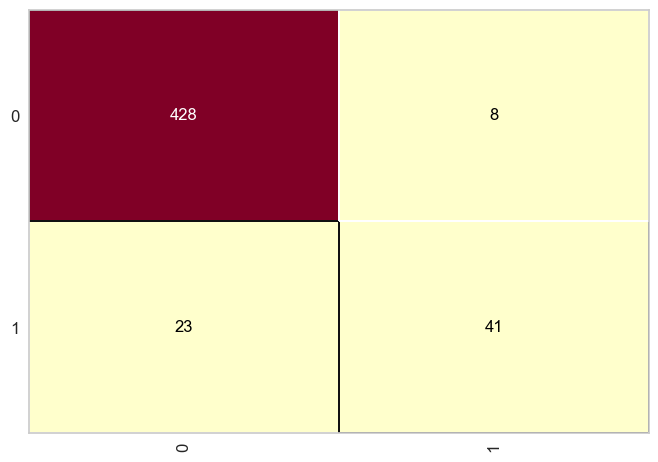

In [39]:
cm = ConfusionMatrix(neive_credito)
cm.fit(x_credito_treinamento, y_credito_treinamento)
cm.score(x_credito_teste, y_credito_teste)

In [43]:
print(classification_report(y_credito_teste, previsoes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500

